In [ ]:
# !conda create -n tensorflow pip python=3.5
# !source activate tensorflow
# !pip install --upgrade tensorflow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\CobyLU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

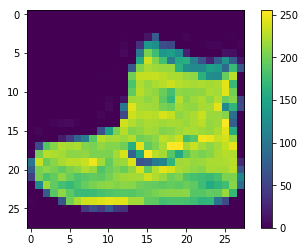

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

NameError: name 'b' is not defined

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.5020 - acc: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3737 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3352 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3116 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2951 - acc: 0.8910


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/step
Test accuracy: 0.8734


In [12]:
predictions = model.predict(test_images)

NameError: name 'model' is not defined

C:\Users\CobyLU\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


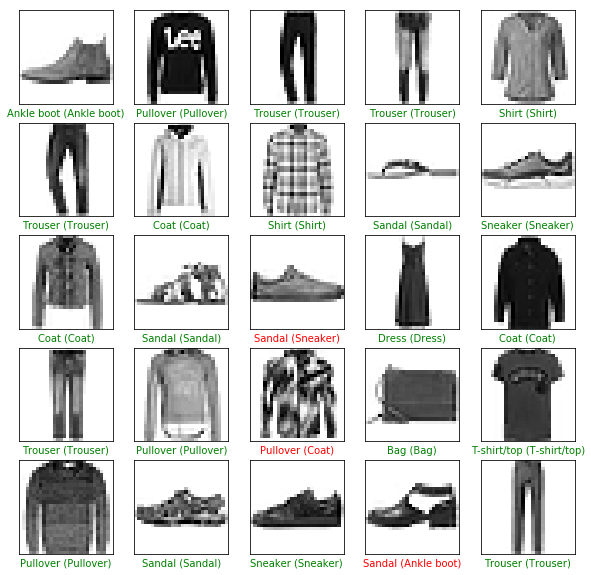

In [16]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [17]:
img = test_images[0]
img = (np.expand_dims(img,0))

predictions = model.predict(img)
print(predictions)

prediction = predictions[0]
np.argmax(prediction)

[[5.6616268e-06 4.4090962e-07 7.4500640e-06 1.8214219e-07 1.3005521e-06
  5.8547806e-02 6.0530192e-06 9.0068623e-02 8.7639501e-06 8.5135376e-01]]


9

In [31]:
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

baseline_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

baseline_model.summary()

baseline_history = baseline_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.6830 - acc: 0.7721 - val_loss: 0.5134 - val_acc: 0.8225
Epoch 2/50
 - 1s - loss: 0.4594 - acc: 0.8423 - val_loss: 0.4591 - val_acc: 0.8397
Epoch 3/50
 - 2s - loss: 0.4110 - acc: 0.8583 - val_loss: 0.4239 - val_acc: 0.8531
Epoch 4/50
 - 2s - loss: 0.3844 - acc: 0.8667 - val_loss: 0.4076 - val_acc: 0.8593
Epoch 5/50
 - 2s - loss: 0.3651 - acc: 0.8727 - val_loss: 0.4298 - val_acc: 0.8493
Epoch 6/50
 - 2s - loss: 0.3554 - acc: 0.8757 - val_loss: 0.3929 - val_acc: 0.8617
Epoch 7/50
 - 2s - loss: 0.3378 - acc: 0.8812 - val_loss: 0.3931 - val_acc: 0.8629
Epoch 8/50
 - 1s - loss: 0.3274 - acc: 0.8836 - val_loss: 0.3815 - val_acc: 0.8661
Epoch 9/50
 - 2s - loss: 0.3190 - acc: 0.8876 - val_loss: 0.3780 - val_acc: 0.8652
Epoch 10/50
 - 2s - loss: 0.3095 - acc: 0.8907 - val_loss: 0.3656 - val_acc: 0.8715
Epoch 11/50
 - 1s - loss: 0.2998 - acc: 0.8940 - val_loss: 0.3776 - val_acc: 0.8642
Epoch 12/50
 - 2s - loss: 0.2965 - 

In [32]:
smaller_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

smaller_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

smaller_model.summary()

smaller_history = smaller_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.8845 - acc: 0.7118 - val_loss: 0.6021 - val_acc: 0.7968
Epoch 2/50
 - 1s - loss: 0.5379 - acc: 0.8175 - val_loss: 0.5247 - val_acc: 0.8203
Epoch 3/50
 - 1s - loss: 0.4786 - acc: 0.8365 - val_loss: 0.4965 - val_acc: 0.8273
Epoch 4/50
 - 1s - loss: 0.4473 - acc: 0.8465 - val_loss: 0.4653 - val_acc: 0.8382
Epoch 5/50
 - 1s - loss: 0.4265 - acc: 0.8545 - val_loss: 0.4483 - val_acc: 0.8461
Epoch 6/50
 - 1s - loss: 0.4094 - acc: 0.8584 - val_loss: 0.4385 - val_acc: 0.8475
Epoch 7/50
 - 1s - loss: 0.3988 - acc: 0.8631 - val_loss: 0.4290 - val_acc: 0.8504
Epoch 8/50
 - 1s - loss: 0.3853 - acc: 0.8664 - val_loss: 0.4390 - val_acc: 0.8413
Epoch 9/50
 - 1s - loss: 0.3773 - acc: 0.8697 - val_loss: 0.4127 - val_acc: 0.8549
Epoch 10/50
 - 1s - loss: 0.3682 - acc: 0.8716 - val_loss: 0.4081 - val_acc: 0.8577
Epoch 11/50
 - 1s - loss: 0.3632 - acc: 0.8736 - val_loss: 0.4195 - val_acc: 0.8526
Epoch 12/50
 - 1s - loss: 0.3581 - 

In [33]:
larger_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

larger_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

larger_model.summary()

larger_history = larger_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 0.6069 - acc: 0.7919 - val_loss: 0.4898 - val_acc: 0.8280
Epoch 2/50
 - 4s - loss: 0.4209 - acc: 0.8537 - val_loss: 0.4478 - val_acc: 0.8416
Epoch 3/50
 - 4s - loss: 0.3790 - acc: 0.8668 - val_loss: 0.3965 - val_acc: 0.8596
Epoch 4/50
 - 4s - loss: 0.3522 - acc: 0.8756 - val_loss: 0.4131 - val_acc: 0.8520
Epoch 5/50
 - 4s - loss: 0.3293 - acc: 0.8821 - val_loss: 0.3934 - val_acc: 0.8613
Epoch 6/50
 - 4s - loss: 0.3140 - acc: 0.8864 - val_loss: 0.3634 - val_acc: 0.8699
Epoch 7/50
 - 4s - loss: 0.2965 - acc: 0.8940 - val_loss: 0.3569 - val_acc: 0.8707
Epoch 8/50
 - 4s - loss: 0.2917 - acc: 0.8940 - val_loss: 0.3535 - val_acc: 0.8730
Epoch 9/50
 - 4s - loss: 0.2750 - acc: 0.9015 - val_loss: 0.3364 - val_acc: 0.8793
Epoch 10/50
 - 4s - loss: 0.2626 - acc: 0.9048 - val_loss: 0.3493 - val_acc: 0.8755
Epoch 11/50
 - 4s - loss: 0.2588 - acc: 0.9053 - val_loss: 0.3351 - val_acc: 0.8826
Epoch 12/50
 - 4s - loss: 0.2510 - 

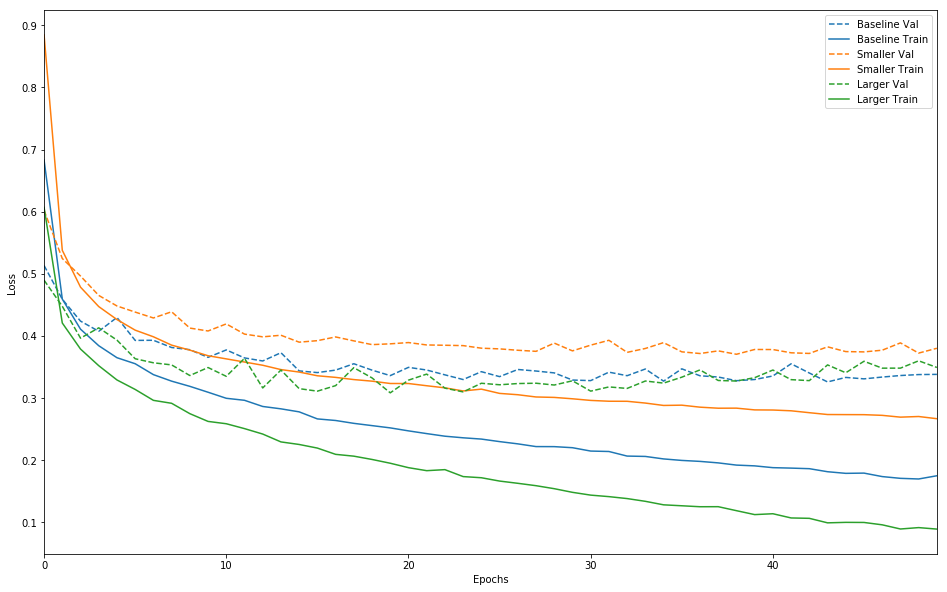

In [34]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('larger', larger_history)])

In [35]:
l2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

l2_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

l2_model.summary()

l2_history = l2_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 1.0420 - acc: 0.7971 - val_loss: 0.8107 - val_acc: 0.8293
Epoch 2/50
 - 4s - loss: 0.7070 - acc: 0.8480 - val_loss: 0.6861 - val_acc: 0.8362
Epoch 3/50
 - 4s - loss: 0.5997 - acc: 0.8604 - val_loss: 0.5969 - val_acc: 0.8500
Epoch 4/50
 - 4s - loss: 0.5391 - acc: 0.8638 - val_loss: 0.5556 - val_acc: 0.8511
Epoch 5/50
 - 4s - loss: 0.4949 - acc: 0.8698 - val_loss: 0.5574 - val_acc: 0.8461
Epoch 6/50
 - 4s - loss: 0.4723 - acc: 0.8702 - val_loss: 0.4846 - val_acc: 0.8631
Epoch 7/50
 - 4s - loss: 0.4437 - acc: 0.8761 - val_loss: 0.5662 - val_acc: 0.8158
Epoch 8/50
 - 4s - loss: 0.4315 - acc: 0.8785 - val_loss: 0.4553 - val_acc: 0.8650
Epoch 9/50
 - 4s - loss: 0.4127 - acc: 0.8802 - val_loss: 0.4544 - val_acc: 0.8650
Epoch 10/50
 - 4s - loss: 0.4103 - acc: 0.8809 - val_loss: 0.4767 - val_acc: 0.8562
Epoch 11/50
 - 4s - loss: 0.4061 - acc: 0.8806 - val_loss: 0.4297 - val_acc: 0.8703
Epoch 12/50
 - 4s - loss: 0.3859 - 

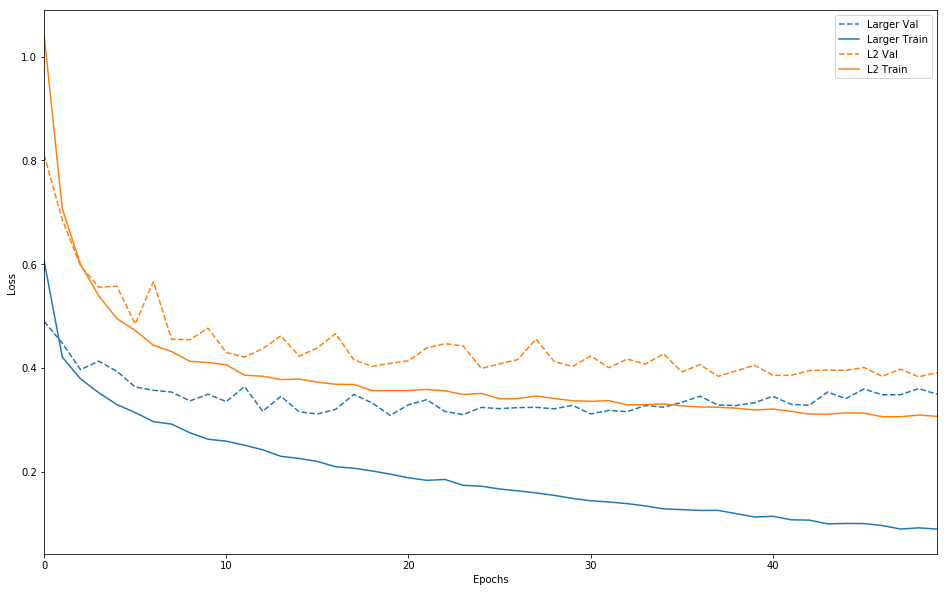

In [39]:
plot_history([('larger', larger_history),
              ('l2', l2_history)])

In [37]:
dpt_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

dpt_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

dpt_model.summary()

dpt_history = dpt_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 0.6794 - acc: 0.7652 - val_loss: 0.4800 - val_acc: 0.8345
Epoch 2/50
 - 4s - loss: 0.4619 - acc: 0.8384 - val_loss: 0.4322 - val_acc: 0.8483
Epoch 3/50
 - 4s - loss: 0.4153 - acc: 0.8528 - val_loss: 0.4030 - val_acc: 0.8576
Epoch 4/50
 - 4s - loss: 0.3881 - acc: 0.8614 - val_loss: 0.3914 - val_acc: 0.8600
Epoch 5/50
 - 4s - loss: 0.3720 - acc: 0.8669 - val_loss: 0.3716 - val_acc: 0.8659
Epoch 6/50
 - 4s - loss: 0.3518 - acc: 0.8739 - val_loss: 0.3636 - val_acc: 0.8694
Epoch 7/50
 - 4s - loss: 0.3391 - acc: 0.8770 - val_loss: 0.3556 - val_acc: 0.8725
Epoch 8/50
 - 4s - loss: 0.3315 - acc: 0.8784 - val_loss: 0.3546 - val_acc: 0.8741
Epoch 9/50
 - 4s - loss: 0.3246 - acc: 0.8818 - val_loss: 0.3480 - val_acc: 0.8730
Epoch 10/50
 - 4s - loss: 0.3170 - acc: 0.8846 - val_loss: 0.3440 - val_acc: 0.8772
Epoch 11/50
 - 4s - loss: 0.3114 - acc: 0.8870 - val_loss: 0.3373 - val_acc: 0.8761
Epoch 12/50
 - 4s - loss: 0.3032 - 

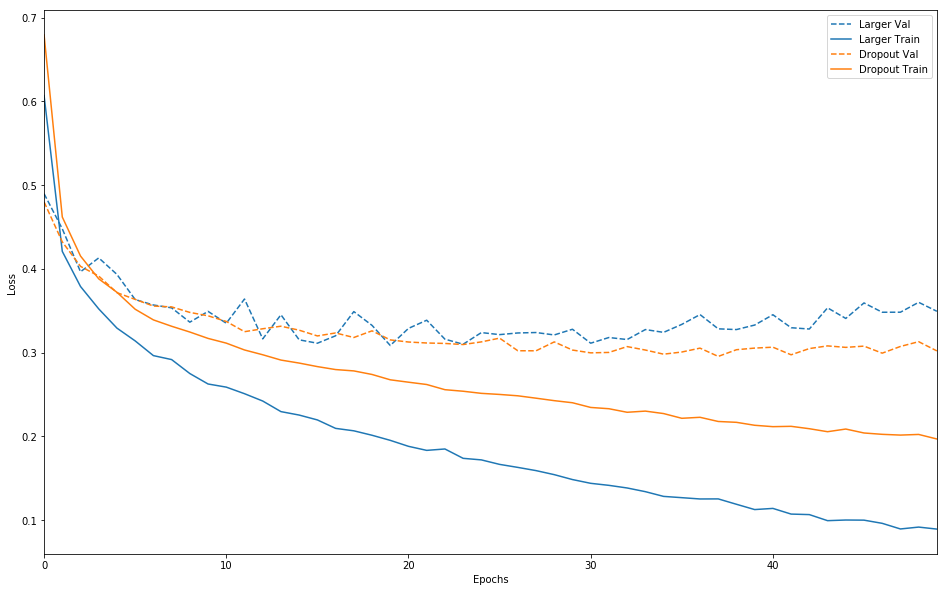

In [41]:
plot_history([('larger', larger_history),
              ('dropout', dpt_history)])

In [1]:
adv_model = keras.Sequential()
adv_model.add(keras.layers.Conv2D(filters=32, kernel_size=(7,7),
                 activation='relu',
                 input_shape=(28, 28, 1)))
adv_model.add(keras.layers.MaxPooling2D(pool_size=2))
adv_model.add(keras.layers.Dropout(0.5))
adv_model.add(keras.layers.Conv2D(filters=32, kernel_size=(7,7),
                 activation='relu'))
adv_model.add(keras.layers.MaxPooling2D(pool_size=2))
adv_model.add(keras.layers.Dropout(0.5))
adv_model.add(keras.layers.Flatten())
adv_model.add(keras.layers.Dense(256, activation='relu'))
adv_model.add(keras.layers.Dense(10, activation='softmax'))

adv_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adv_model.summary()

x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
adv_history = adv_model.fit(x_train,
                                      train_labels,
                                      epochs=20,
                                      batch_size=64,
                                      validation_data=(x_test, test_labels),
                                      verbose=2)

NameError: name 'keras' is not defined

In [ ]:
plot_history([('larger', larger_history),
              ('dropout', dpt_history),
              ('advanced', adv_history)])